In [244]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import sympy as sp
from sympy import symbols, lambdify, exp, LambertW
import scipy.optimize as spo

In [245]:
g = 1.16e-5
q = -1.16e-19

In [246]:
def V(r, mu, Z):
    V = -g**2 * np.exp(-mu * r) / (r) + (Z * q**2 / (r ))
    return V

def menos_potencial(r,mu,Z):
    V = -g**2 * np.exp(-mu * r) / (r) + (Z * q**2 / (r ))
    return -V

In [247]:
r = np.linspace(0.01,0.05,1000)

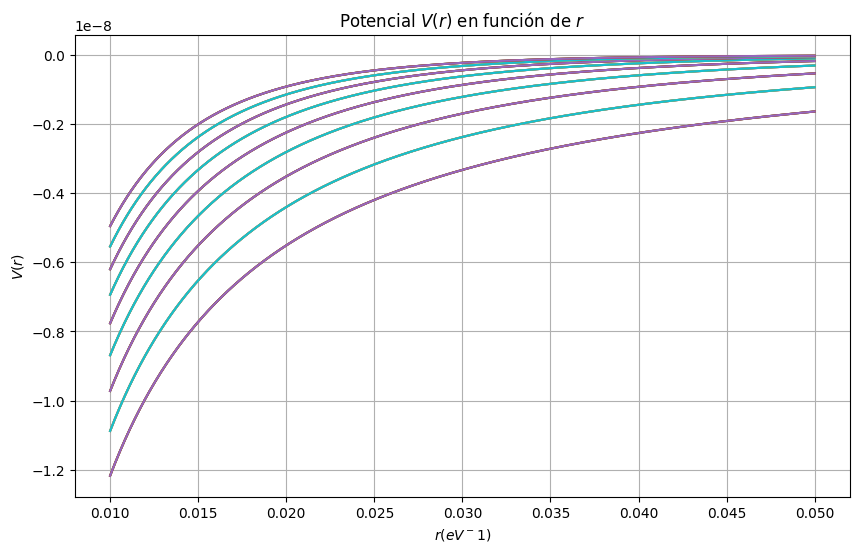

La gráfica muestra cómo el potencial 0 es una asíntota de la gráfica, esto debido a que la función exponencial tiene dicho valor como asíntota.


In [248]:
mu_values = np.linspace(10,100,9)
Z_values = np.linspace(10,100,5)

# Graficar V(r) para distintos mu y Z
plt.figure(figsize=(10, 6))
for mu in mu_values:
    for Z in Z_values:
        plt.plot(r, V(r, mu, Z), label=f'mu={mu}, Z={Z}')

plt.title('Potencial $V(r)$ en función de $r$')
plt.xlabel('$r(eV^-1)$')
plt.ylabel('$V(r)$')
plt.grid(True)
plt.show()
print('La gráfica muestra cómo el potencial 0 es una asíntota de la gráfica, esto debido a que la función exponencial tiene dicho valor como asíntota.')

In [249]:
def energy(r,mu,Z):
    return V(r,mu,Z)

In [250]:
mu_opt = 5
Z_opt = 100

bounds = (0, 0.05)

result = minimize_scalar(energy, args=(mu_opt, Z_opt), bounds=bounds, method='bounded')

optimal_radius = result.x

print("Radio óptimo para mu=" +  str(mu_opt) + ", Z=" + str(Z_opt), " es: " + str(optimal_radius), 'eV^-1')

Radio óptimo para mu=5, Z=100  es: 5.320180123926299e-06 eV^-1


In [251]:


r, mu, Z, g, q = sp.symbols('r mu Z g q')

V = -g**2 * sp.exp(-mu * r) / r + Z * q**2 / r


dV_dr = sp.diff(V, r)

puntos_criticos = sp.solve(dV_dr, r)

print("Puntos críticos" + str(puntos_criticos))

expr_Z = puntos_criticos[0]

expr_V = -g**2 * exp(-mu * r) / r + Z * q**2 / r

energia_numerica = lambdify((r, mu, Z, q, g), expr_V, 'numpy')


mu_opt = 80  
Z_opt = 1  

result = minimize_scalar(lambda r: -energia_numerica(r, mu_opt, Z_opt, 1.6e-19, 1.16e-5), bounds=(0, 0.05), method='bounded')


r_max = result.x

print("Radio máximo para mu=" + str(mu_opt)+ ","+ " Z="+ str(Z_opt), " , el r_max es igual a " +str(r_max),' Gev^-1')


Puntos críticos[(-LambertW(-Z*q**2*exp(-1)/g**2) - 1)/mu]
Radio máximo para mu=80, Z=1  , el r_max es igual a 0.04999474178856194  Gev^-1


In [252]:
#Solución a la ecuación de schrodinguer por medio de potenciales finitos.

V = -g**2 * sp.exp(-mu * r) / r + Z * q**2 / r

E = sp.symbols('E')
A, B, C = sp.symbols('A B C')
k = sp.sqrt((2 * mu / 1**2) * (V - E))
u_outer = A * sp.sin(k * r) + B * sp.cos(k * r)

kappa = sp.sqrt((2 * mu / 1**2) * (E - V))
u_inner = C * sp.exp(-kappa * r)

T = sp.simplify((sp.Abs(C)**2) / (sp.Abs(A)**2))

print("Expresión para T: " + str(T))






Expresión para T: Abs(C**2/A**2)


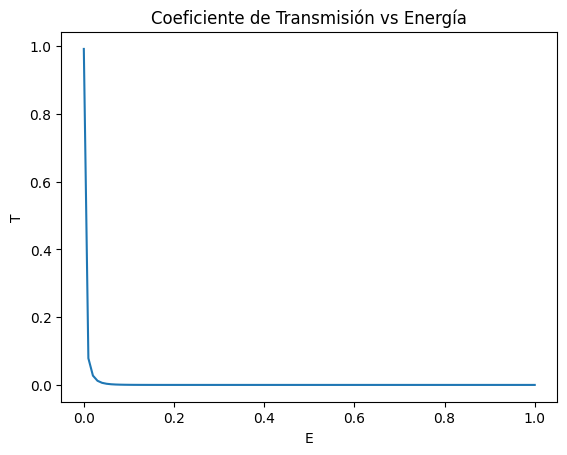

In [253]:

E, g, r, q = sp.symbols('E g r q')


T_expresion = sp.exp(-8*sp.sqrt(10)*sp.sqrt(E + g**2*sp.exp(-80*r)/r - 1.6e-40*q**2/r))


def evaluar_expresion(E_val):
    
    valores = {g: 1.16e-5, r: r_max, q: -1.16e-19} 
    
    valores[E] = E_val
    
    T_val = T_expresion.evalf(subs=valores)
    return T_val


T_func = np.vectorize(evaluar_expresion)

epsilon=10**(-7)
E_valores = np.linspace(epsilon, 1, 100)
T_valores = T_func(E_valores)


plt.plot(E_valores, T_valores)
plt.xlabel('E')
plt.ylabel('T')
plt.title('Coeficiente de Transmisión vs Energía')
plt.show()



In [254]:
valores = {g: 1.16e-5, r: r_max, q: -1.16e-19} 

E = sp.symbols('E')


ecuacion = T_expresion.subs(valores) - 1

solucion = sp.solve(ecuacion, E)
print("El valor de energía que hace que T=1 es:")
for sol in solucion:
    absoluto=[]
    absoluto.append(abs(sol))
absoluto.sort()
print(absoluto[len(absoluto)-1],'GeV. Este valor es muy cercano a 0 pero llega a este valor debido a que como se vio anteriormente el potencial nunca es 0, debido a que la energía total tampoco.')








El valor de energía que hace que T=1 es:
4.93169727403858e-11 GeV. Este valor es muy cercano a 0 pero llega a este valor debido a que como se vio anteriormente el potencial nunca es 0, debido a que la energía total tampoco.
